# 12 Jan - Word2Vec

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

### 1. Loading Data

In [2]:
#define the training corpus
#I use the Inaugural Address Corpus from NLTK
import nltk
from nltk.corpus import inaugural
corpus = nltk.corpus.inaugural.sents()

In [3]:
corpus

[['Fellow', '-', 'Citizens', 'of', 'the', 'Senate', 'and', 'of', 'the', 'House', 'of', 'Representatives', ':'], ['Among', 'the', 'vicissitudes', 'incident', 'to', 'life', 'no', 'event', 'could', 'have', 'filled', 'me', 'with', 'greater', 'anxieties', 'than', 'that', 'of', 'which', 'the', 'notification', 'was', 'transmitted', 'by', 'your', 'order', ',', 'and', 'received', 'on', 'the', '14th', 'day', 'of', 'the', 'present', 'month', '.'], ...]

In [4]:
len(corpus)

5220

In [5]:
#the corpus is already tokenized
#convert the words in the corpus into lower case
corpus_tokenized = [[]] * len(corpus)
for i in range(len(corpus)):
    corpus_tokenized[i] = [word.lower() for word in corpus[i]]

print(corpus_tokenized[:5])

[['fellow', '-', 'citizens', 'of', 'the', 'senate', 'and', 'of', 'the', 'house', 'of', 'representatives', ':'], ['among', 'the', 'vicissitudes', 'incident', 'to', 'life', 'no', 'event', 'could', 'have', 'filled', 'me', 'with', 'greater', 'anxieties', 'than', 'that', 'of', 'which', 'the', 'notification', 'was', 'transmitted', 'by', 'your', 'order', ',', 'and', 'received', 'on', 'the', '14th', 'day', 'of', 'the', 'present', 'month', '.'], ['on', 'the', 'one', 'hand', ',', 'i', 'was', 'summoned', 'by', 'my', 'country', ',', 'whose', 'voice', 'i', 'can', 'never', 'hear', 'but', 'with', 'veneration', 'and', 'love', ',', 'from', 'a', 'retreat', 'which', 'i', 'had', 'chosen', 'with', 'the', 'fondest', 'predilection', ',', 'and', ',', 'in', 'my', 'flattering', 'hopes', ',', 'with', 'an', 'immutable', 'decision', ',', 'as', 'the', 'asylum', 'of', 'my', 'declining', 'years', '--', 'a', 'retreat', 'which', 'was', 'rendered', 'every', 'day', 'more', 'necessary', 'as', 'well', 'as', 'more', 'dear',

In [6]:
#remove stop words with SpaCy
import spacy
nlp = spacy.load("en_core_web_sm")
stopwords = nlp.Defaults.stop_words

for sentence in corpus_tokenized:
    for word in sentence[:]:
        if word in stopwords:
            sentence.remove(word)

print(corpus_tokenized[:5])

[['fellow', '-', 'citizens', 'senate', 'house', 'representatives', ':'], ['vicissitudes', 'incident', 'life', 'event', 'filled', 'greater', 'anxieties', 'notification', 'transmitted', 'order', ',', 'received', '14th', 'day', 'present', 'month', '.'], ['hand', ',', 'summoned', 'country', ',', 'voice', 'hear', 'veneration', 'love', ',', 'retreat', 'chosen', 'fondest', 'predilection', ',', ',', 'flattering', 'hopes', ',', 'immutable', 'decision', ',', 'asylum', 'declining', 'years', '--', 'retreat', 'rendered', 'day', 'necessary', 'dear', 'addition', 'habit', 'inclination', ',', 'frequent', 'interruptions', 'health', 'gradual', 'waste', 'committed', 'time', '.'], ['hand', ',', 'magnitude', 'difficulty', 'trust', 'voice', 'country', 'called', ',', 'sufficient', 'awaken', 'wisest', 'experienced', 'citizens', 'distrustful', 'scrutiny', 'qualifications', ',', 'overwhelm', 'despondence', '(', 'inheriting', 'inferior', 'endowments', 'nature', 'unpracticed', 'duties', 'civil', 'administration', 

In [7]:
#remove punctutations with String
import string
punctutations = string.punctuation

for sentence in corpus_tokenized:
    for word in sentence[:]:
        if word in punctutations:
            sentence.remove(word)

print(corpus_tokenized[:5])

[['fellow', 'citizens', 'senate', 'house', 'representatives'], ['vicissitudes', 'incident', 'life', 'event', 'filled', 'greater', 'anxieties', 'notification', 'transmitted', 'order', 'received', '14th', 'day', 'present', 'month'], ['hand', 'summoned', 'country', 'voice', 'hear', 'veneration', 'love', 'retreat', 'chosen', 'fondest', 'predilection', 'flattering', 'hopes', 'immutable', 'decision', 'asylum', 'declining', 'years', '--', 'retreat', 'rendered', 'day', 'necessary', 'dear', 'addition', 'habit', 'inclination', 'frequent', 'interruptions', 'health', 'gradual', 'waste', 'committed', 'time'], ['hand', 'magnitude', 'difficulty', 'trust', 'voice', 'country', 'called', 'sufficient', 'awaken', 'wisest', 'experienced', 'citizens', 'distrustful', 'scrutiny', 'qualifications', 'overwhelm', 'despondence', 'inheriting', 'inferior', 'endowments', 'nature', 'unpracticed', 'duties', 'civil', 'administration', 'ought', 'peculiarly', 'conscious', 'deficiencies'], ['conflict', 'emotions', 'dare',

In [8]:
#remove '--'
for sentence in corpus_tokenized:
    for word in sentence[:]:
        if word == '--':
            sentence.remove(word)

print(corpus_tokenized[:5])

[['fellow', 'citizens', 'senate', 'house', 'representatives'], ['vicissitudes', 'incident', 'life', 'event', 'filled', 'greater', 'anxieties', 'notification', 'transmitted', 'order', 'received', '14th', 'day', 'present', 'month'], ['hand', 'summoned', 'country', 'voice', 'hear', 'veneration', 'love', 'retreat', 'chosen', 'fondest', 'predilection', 'flattering', 'hopes', 'immutable', 'decision', 'asylum', 'declining', 'years', 'retreat', 'rendered', 'day', 'necessary', 'dear', 'addition', 'habit', 'inclination', 'frequent', 'interruptions', 'health', 'gradual', 'waste', 'committed', 'time'], ['hand', 'magnitude', 'difficulty', 'trust', 'voice', 'country', 'called', 'sufficient', 'awaken', 'wisest', 'experienced', 'citizens', 'distrustful', 'scrutiny', 'qualifications', 'overwhelm', 'despondence', 'inheriting', 'inferior', 'endowments', 'nature', 'unpracticed', 'duties', 'civil', 'administration', 'ought', 'peculiarly', 'conscious', 'deficiencies'], ['conflict', 'emotions', 'dare', 'aver

In [9]:
#get unique words
flatten = lambda l: [item for sublist in l for item in sublist]
vocabs = list(set(flatten(corpus_tokenized)))

print(len(vocabs))

9019


In [10]:
#numericalize the words
word2index = {w: i for i, w in enumerate(vocabs)}

word2index

{'competent': 0,
 'inspirations': 1,
 'macleish': 2,
 'remote': 3,
 'famed': 4,
 'owners': 5,
 'directs': 6,
 'proved': 7,
 '1897': 8,
 'views': 9,
 'instantly': 10,
 'utterly': 11,
 'forbearers': 12,
 'birthright': 13,
 'compared': 14,
 'richest': 15,
 'conventions': 16,
 'willing': 17,
 'anxiety': 18,
 'safeguard': 19,
 'dies': 20,
 'bleed': 21,
 'devastates': 22,
 'insufficient': 23,
 'instruct': 24,
 'ground': 25,
 'stagnant': 26,
 'volunteer': 27,
 'radical': 28,
 'warfare': 29,
 'foundation': 30,
 'fought': 31,
 'deepest': 32,
 'employees': 33,
 'coarse': 34,
 'title': 35,
 'broken': 36,
 'downfall': 37,
 'composition': 38,
 'negotiated': 39,
 'discrimination': 40,
 'stimulate': 41,
 'faithfully': 42,
 'leaving': 43,
 'withal': 44,
 'pres': 45,
 'agent': 46,
 'resume': 47,
 'reconsider': 48,
 'unceasing': 49,
 'terminated': 50,
 'considerate': 51,
 'bipartisanship': 52,
 'recommendations': 53,
 'housing': 54,
 'soul': 55,
 'waver': 56,
 'kite': 57,
 'unreserved': 58,
 'sensibly':

In [11]:
#append <UNK>
vocabs.append('<UNK>')
word2index['<UNK>'] = 9019

len(word2index)

9020

### 2. CBOW

#### 2.1. Preparing Training Data

In [12]:
#random batch for CBOW model with default window size and batch size of 1 each
def random_batch_cbow(window_size=1, batch_size=1): 
    cbow = []
    for sentence in corpus_tokenized:
        #I include the first and last words
        #so that every word could be a center word
        for i in range(len(sentence)):
            center = word2index[sentence[i]]
            context = []
            context_idx = []
            #group the indices of the context words
            for j in range(window_size):
                context_idx.append(i - window_size + j)
            for k in range(1, window_size + 1):
                context_idx.append(i + k)
            #append the context words based on their indices
            #append <UNK> if there is no word at an index
            for idx in context_idx:
                if idx < 0:
                    context.append(word2index['<UNK>'])
                elif idx >= len(sentence):
                    context.append(word2index['<UNK>'])
                else:
                    context.append(word2index[sentence[idx]])
            cbow.append([context, center])
    
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(cbow)), batch_size, replace=False)
    for i in random_index:
        random_inputs.append(cbow[i][0])
        random_labels.append([cbow[i][1]])
            
    return np.array(random_inputs), np.array(random_labels)

In [13]:
#test the CBOW method
input_batch, target_batch = random_batch_cbow(2, 10)

print("Input: ", input_batch)
print("Target: ", target_batch)

Input:  [[1142 5297 5495 4784]
 [9019 9019 2691 8784]
 [6604 7865 3987 9019]
 [8966 7448 8219 9019]
 [1915 4018 7777 3364]
 [ 688 6128 8406 9019]
 [8945 5493 8853 6010]
 [5617 2821 4782 1231]
 [2263 5854  468 2287]
 [9019 9019 8853 5480]]
Target:  [[6382]
 [7403]
 [1161]
 [5654]
 [4274]
 [1766]
 [4334]
 [1476]
 [  87]
 [5864]]


#### 2.2 Model

In [14]:
#CBOW model
class CBOW(nn.Module):
    
    def __init__(self, vocab_size, emb_size):
        super(CBOW,self).__init__()
        self.embedding_center_word = nn.Embedding(vocab_size, emb_size)
        self.embedding_outside_word = nn.Embedding(vocab_size, emb_size)
    
    def forward(self, outside_words, center_words, all_vocabs):
        center_embeds = self.embedding_center_word(center_words)  #[batch_size, 1, emb_size]
        outside_embeds = self.embedding_outside_word(outside_words)  #[batch_size, window_size, emb_size]
        all_embeds    = self.embedding_center_word(all_vocabs)    #[batch_size, vocab_size, emb_size]
        
        scores      = center_embeds.bmm(outside_embeds.transpose(1, 2)).squeeze(2)

        norm_scores = all_embeds.bmm(outside_embeds.transpose(1, 2)).squeeze(2)

        nll = -torch.mean(torch.log(torch.exp(scores)/torch.sum(torch.exp(norm_scores), 1).unsqueeze(1)))
            
        return nll # negative log likelihood

#### 2.3. Training

In [15]:
#set training parameters
window_size = 2
batch_size = 10
vocab_size = len(vocabs)
emb_size = 2
model = CBOW(vocab_size, emb_size)
optimizer = optim.Adam(model.parameters(), lr=0.001)

#convert all vocabs to tensors
def prepare_sequence(vocabs, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], vocabs))
    return torch.LongTensor(idxs)

all_vocabs = prepare_sequence(list(vocabs), word2index).expand(batch_size, vocab_size)

#calculate epoch time
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time // 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

#train the model
import time

num_epochs = 500
start = time.time()
for epoch in range(num_epochs):
    
    input_batch, target_batch = random_batch_cbow(window_size, batch_size)
    input_batch  = torch.LongTensor(input_batch)  #[batch_size, 1]
    target_batch = torch.LongTensor(target_batch) #[batch_size, 1]

    optimizer.zero_grad()
    loss = model(input_batch, target_batch, all_vocabs)
    
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        end = time.time()
        epoch_mins, epoch_secs = epoch_time(start, end)

        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")

Epoch: 100 | cost: 10.123297 | time: 0m 37s
Epoch: 200 | cost: 10.113264 | time: 1m 14s
Epoch: 300 | cost: 9.527828 | time: 1m 51s
Epoch: 400 | cost: 9.653073 | time: 2m 28s
Epoch: 500 | cost: 9.639301 | time: 3m 7s


#### 2.4. Plotting the Embeddings

In [16]:
#get embedding
def get_embed(word):
    try:
        index = word2index[word]
    except:
        index = word2index['<UNK>']
    
    word = torch.LongTensor([index])

    center_embed  = model.embedding_center_word(word)
    outside_embed = model.embedding_outside_word(word)
    
    embed = (center_embed + outside_embed) / 2
    
    return  embed[0][0].item(), embed[0][1].item()

['competent', 'inspirations', 'macleish', 'remote', 'famed', 'owners', 'directs', 'proved', '1897', 'views', 'instantly', 'utterly', 'forbearers', 'birthright', 'compared', 'richest', 'conventions', 'willing', 'anxiety', 'safeguard']


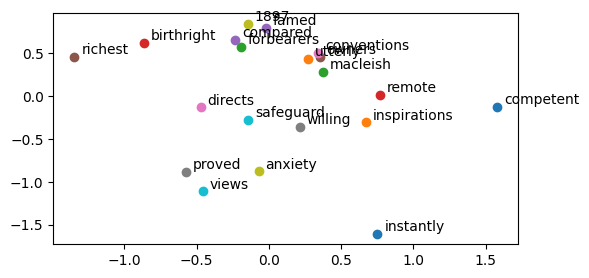

In [17]:
#plot the embeddings of the first 20 vocabs
print(vocabs[:20])

plt.figure(figsize=(6,3))
for i, word in enumerate(vocabs[:20]):
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

#### 2.5. Cosine Similarity

In [18]:
#select a few vocabs and get their embeddings
liberty = get_embed('liberty')
freedom = get_embed('freedom')
democracy = get_embed('democracy')
magic = get_embed('magic')


#define cosine similarity
from numpy import dot
from numpy.linalg import norm

def cos_sim(a, b):
    cos_sim = dot(a, b)/(norm(a)*norm(b))
    return cos_sim

#print cosine similarities between the selected vocabs
print(f"liberty vs. freedom: ", cos_sim(liberty, freedom))
print(f"liberty vs. democracy: ", cos_sim(liberty, democracy))
print(f"liberty vs. magic: ", cos_sim(liberty, magic))

liberty vs. freedom:  -0.3030223962372246
liberty vs. democracy:  0.17827365918599788
liberty vs. magic:  -0.9468923136110864


### 3. Skip-gram

#### 3.1. Preparing Traning Data

In [19]:
#random batch for Skip-gram model with default window size and batch size of 1 each
def random_batch_skip_gram(window_size=1, batch_size=1): 
    skip_grams = []
    for sentence in corpus_tokenized:
        #I include the first and last words
        #so that every word could be a center word
        for i in range(len(sentence)):
            center = word2index[sentence[i]]
            context = []
            for j in range(window_size):
                if (i - window_size + j) >= 0:
                    context.append(word2index[sentence[i - window_size + j]])
            for k in range(1, window_size + 1):
                if (i + k) < len(sentence):
                    context.append(word2index[sentence[i + k]])
            for w in context:
                skip_grams.append([center, w])
    
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(skip_grams)), batch_size, replace=False)
    for i in random_index:
        random_inputs.append([skip_grams[i][0]])
        random_labels.append([skip_grams[i][1]])
            
    return np.array(random_inputs), np.array(random_labels)

In [20]:
#test the Skip-gram method
input_batch, target_batch = random_batch_skip_gram(2, 10)

print("Input: ", input_batch)
print("Target: ", target_batch)

Input:  [[8025]
 [3059]
 [8937]
 [7535]
 [4983]
 [7650]
 [8021]
 [ 804]
 [7992]
 [3322]]
Target:  [[4982]
 [7229]
 [1853]
 [2481]
 [1145]
 [4546]
 [8939]
 [7923]
 [2601]
 [5390]]


#### 3.2. Model

In [21]:
#Skip-gram model
class Skipgram(nn.Module):
    
    def __init__(self, vocab_size, emb_size):
        super(Skipgram,self).__init__()
        self.embedding_center_word = nn.Embedding(vocab_size, emb_size)
        self.embedding_outside_word = nn.Embedding(vocab_size, emb_size)
    
    def forward(self, center_words, outside_words, all_vocabs):
        center_embeds = self.embedding_center_word(center_words)  #[batch_size, 1, emb_size]
        outside_embeds = self.embedding_outside_word(outside_words)  #[batch_size, 1, emb_size]
        all_embeds    = self.embedding_outside_word(all_vocabs)    #[batch_size, vocab_size, emb_size]
        
        scores      = outside_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, 1, emb_size] @ [batch_size, emb_size, 1] = [batch_size, 1, 1] = [batch_size, 1]

        norm_scores = all_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, vocab_size, emb_size] @ [batch_size, emb_size, 1] = [batch_size, vocab_size, 1] = [batch_size, vocab_size]

        nll = -torch.mean(torch.log(torch.exp(scores)/torch.sum(torch.exp(norm_scores), 1).unsqueeze(1))) # log-softmax
        # scalar (loss must be scalar)    
            
        return nll # negative log likelihood

#### 3.3. Training

In [22]:
#set training parameters
window_size = 2
batch_size = 10
vocab_size = len(vocabs)
emb_size = 2
model = Skipgram(vocab_size, emb_size)
optimizer = optim.Adam(model.parameters(), lr=0.001)

#convert all vocabs to tensors
def prepare_sequence(vocabs, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], vocabs))
    return torch.LongTensor(idxs)

all_vocabs = prepare_sequence(list(vocabs), word2index).expand(batch_size, vocab_size)

#calculate epoch time
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time // 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

#train the model
import time

num_epochs = 500
start = time.time()
for epoch in range(num_epochs):
    
    input_batch, target_batch = random_batch_skip_gram(window_size, batch_size)
    input_batch  = torch.LongTensor(input_batch)  #[batch_size, 1]
    target_batch = torch.LongTensor(target_batch) #[batch_size, 1]

    optimizer.zero_grad()
    loss = model(input_batch, target_batch, all_vocabs)
    
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        end = time.time()
        epoch_mins, epoch_secs = epoch_time(start, end)

        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")

Epoch: 100 | cost: 9.677801 | time: 0m 51s
Epoch: 200 | cost: 10.678329 | time: 1m 39s
Epoch: 300 | cost: 9.654852 | time: 2m 28s
Epoch: 400 | cost: 9.994661 | time: 3m 24s
Epoch: 500 | cost: 9.667760 | time: 4m 12s


**The total training time for Skip-gram is 4 minutes and 28 seconds.**

#### 3.4. Plotting the Embeddings

['competent', 'inspirations', 'macleish', 'remote', 'famed', 'owners', 'directs', 'proved', '1897', 'views', 'instantly', 'utterly', 'forbearers', 'birthright', 'compared', 'richest', 'conventions', 'willing', 'anxiety', 'safeguard']


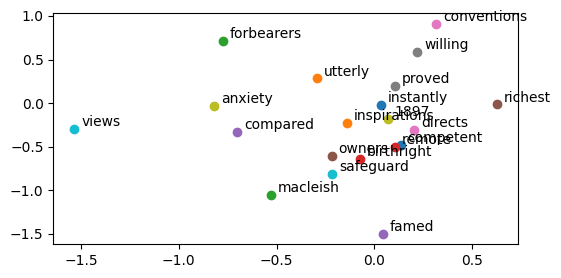

In [23]:
#plot the embeddings of the first 20 vocabs
print(vocabs[:20])

plt.figure(figsize=(6,3))
for i, word in enumerate(vocabs[:20]):
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

#### 3.5. Cosine Similarity

In [24]:
#select a few vocabs and get their embeddings
liberty = get_embed('liberty')
freedom = get_embed('freedom')
democracy = get_embed('democracy')
magic = get_embed('magic')


#define cosine similarity
from numpy import dot
from numpy.linalg import norm

def cos_sim(a, b):
    cos_sim = dot(a, b)/(norm(a)*norm(b))
    return cos_sim

#print cosine similarities between the selected vocabs
print(f"liberty vs. freedom: ", cos_sim(liberty, freedom))
print(f"liberty vs. democracy: ", cos_sim(liberty, democracy))
print(f"liberty vs. magic: ", cos_sim(liberty, magic))

liberty vs. freedom:  -0.874135577765702
liberty vs. democracy:  -0.5225578989152271
liberty vs. magic:  0.40046326610926447


### 4. Skip-gram with Negative Sampling

#### 4.1. Unigram Distribution

In [25]:
#count all the occurrences of vocabs
from collections import Counter
word_count = Counter(flatten(corpus_tokenized))

word_count

Counter({'fellow': 158,
         'citizens': 248,
         'senate': 16,
         'house': 12,
         'representatives': 19,
         'vicissitudes': 5,
         'incident': 8,
         'life': 140,
         'event': 16,
         'filled': 6,
         'greater': 54,
         'anxieties': 3,
         'notification': 1,
         'transmitted': 3,
         'order': 66,
         'received': 12,
         '14th': 1,
         'day': 98,
         'present': 86,
         'month': 2,
         'hand': 51,
         'summoned': 6,
         'country': 322,
         'voice': 24,
         'hear': 12,
         'veneration': 5,
         'love': 56,
         'retreat': 9,
         'chosen': 23,
         'fondest': 1,
         'predilection': 1,
         'flattering': 1,
         'hopes': 38,
         'immutable': 3,
         'decision': 14,
         'asylum': 1,
         'declining': 3,
         'years': 143,
         'rendered': 7,
         'necessary': 82,
         'dear': 8,
         'addition': 6,


In [26]:
#count the number of total words
num_total_words = sum([c for w, c in word_count.items()])

num_total_words

58916

In [27]:
#create the scaled-up unigram distribution table for vocabs

z = 0.001 #the scaler

unigram_table = []
for v in vocabs:
    unigram_table.extend([v] * int(((word_count[v]/num_total_words)**0.75)/z))

Counter(unigram_table)

Counter({'competent': 1,
         'proved': 2,
         'views': 3,
         'willing': 2,
         'anxiety': 1,
         'ground': 1,
         'warfare': 1,
         'foundation': 1,
         'fought': 1,
         'deepest': 1,
         'employees': 1,
         'title': 1,
         'faithfully': 2,
         'recommendations': 1,
         'soul': 1,
         'self': 6,
         'seeks': 1,
         'practice': 2,
         'dollar': 1,
         'gained': 1,
         'consequent': 1,
         'appear': 2,
         'author': 1,
         'language': 1,
         'listen': 1,
         'briefly': 1,
         'investigation': 1,
         'extravagance': 1,
         'hostile': 1,
         'fulfilled': 1,
         'altogether': 1,
         'election': 3,
         'passion': 2,
         'general': 6,
         'generation': 4,
         'treason': 1,
         'session': 1,
         'systems': 1,
         'abandon': 1,
         '000': 2,
         'dignity': 3,
         'invasion': 1,
         'plan

#### 4.2. Negative Sampling

In [28]:
#convert word indices to tensors
def prepare_sequence(seq, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

#generate random negative samples
import random

def negative_sampling(targets, unigram_table, k):
    batch_size = targets.size(0)
    neg_samples = []
    for i in range(batch_size):
        nsample = []
        target_index = targets[i].item()
        while len(nsample) < k:
            neg = random.choice(unigram_table)
            if word2index[neg] == target_index:
                continue
            nsample.append(neg)
        neg_samples.append(prepare_sequence(nsample, word2index).view(1, -1))
    
    return torch.cat(neg_samples)

In [29]:
#test the negative sampling method
input_batch, target_batch = random_batch_skip_gram(2, 10)
input_batch = torch.LongTensor(input_batch)
target_batch = torch.LongTensor(target_batch)

num_neg = 5 #number of negative samples for each target word

neg_samples = negative_sampling(target_batch, unigram_table, num_neg)

neg_samples

tensor([[ 950, 6081,  669,  915, 2969],
        [3964, 1346, 5210, 3769, 8708],
        [6881, 7459, 3280, 5633, 6598],
        [1766, 2129, 3258, 5226, 4477],
        [8525, 6834, 7747, 2126,  408],
        [ 728, 2680, 2352, 6120, 7350],
        [8549,  101, 5239, 3017, 2680],
        [2684, 4068, 4415, 7937, 5314],
        [3212, 4579, 3973, 6054, 2889],
        [5361, 6756, 5735, 6306, 1090]])

#### 4.3. Model

In [30]:
#Skip-gram with negative sampling model
class SkipgramNegSampling(nn.Module):
    
    def __init__(self, vocab_size, emb_size):
        super(SkipgramNegSampling, self).__init__()
        self.embedding_center_word = nn.Embedding(vocab_size, emb_size)
        self.embedding_outside_word = nn.Embedding(vocab_size, emb_size)
        self.logsigmoid = nn.LogSigmoid()
                    
    def forward(self, center_words, outside_words, neg_samples):
        center_embeds  = self.embedding_center_word(center_words) # [batch_size, 1, emb_size]
        outside_embeds = self.embedding_outside_word(outside_words) # [batch_size, 1, emb_size]
        neg_embeds     = self.embedding_outside_word(neg_samples) # [batch_size, num_neg, emb_size]
        
        positive_score = outside_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, 1, emb_size] @ [batch_size, emb_size, 1] = [batch_size, 1, 1] = [batch_size, 1]
        
        negative_score = -neg_embeds.bmm(center_embeds.transpose(1, 2))
        #[batch_size, k, emb_size] @ [batch_size, emb_size, 1] = [batch_size, num_neg, 1]
        
        loss = -torch.mean(self.logsigmoid(positive_score) + torch.sum(self.logsigmoid(negative_score), 1))
                
        return loss

#### 4.4. Training

In [31]:
#set parameters
window_size = 2
batch_size  = 10
vocab_size  = len(vocabs)
emb_size    = 2
model       = SkipgramNegSampling(vocab_size, emb_size)
num_neg     = 10
optimizer   = optim.Adam(model.parameters(), lr=0.001)

#calculate epoch time
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time // 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

#train the model
import time

num_epochs = 500
start = time.time()
for epoch in range(num_epochs):    
    input_batch, target_batch = random_batch_skip_gram(window_size, batch_size)
    input_batch = torch.LongTensor(input_batch)
    target_batch = torch.LongTensor(target_batch)
    neg_samples = negative_sampling(target_batch, unigram_table, num_neg)
    
    optimizer.zero_grad()   
    loss = model(input_batch, target_batch, neg_samples)
    
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        end = time.time()
        epoch_mins, epoch_secs = epoch_time(start, end)
        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")

Epoch: 100 | cost: 8.853144 | time: 0m 52s
Epoch: 200 | cost: 8.756504 | time: 1m 42s
Epoch: 300 | cost: 8.152197 | time: 2m 31s
Epoch: 400 | cost: 9.962812 | time: 3m 19s
Epoch: 500 | cost: 8.640422 | time: 4m 7s


**The total training time for Skip-gram with negative sampling is 4 minutes and 18 seconds. It is a little bit faster than normal Skip-gram**

#### 4.5. Plotting the Embeddings

['competent', 'inspirations', 'macleish', 'remote', 'famed', 'owners', 'directs', 'proved', '1897', 'views', 'instantly', 'utterly', 'forbearers', 'birthright', 'compared', 'richest', 'conventions', 'willing', 'anxiety', 'safeguard']


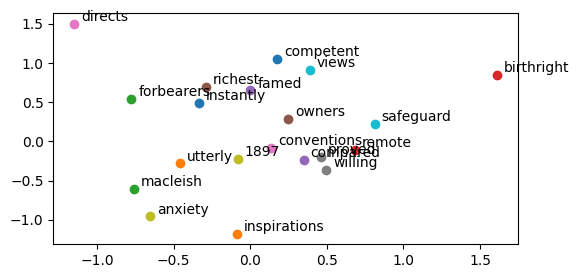

In [32]:
#plot the embeddings of the first 20 vocabs
print(vocabs[:20])

plt.figure(figsize=(6,3))
for i, word in enumerate(vocabs[:20]):
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

#### 4.6. Cosine Similarity

In [33]:
#select a few vocabs and get their embeddings
liberty = get_embed('liberty')
freedom = get_embed('freedom')
democracy = get_embed('democracy')
magic = get_embed('magic')


#define cosine similarity
from numpy import dot
from numpy.linalg import norm

def cos_sim(a, b):
    cos_sim = dot(a, b)/(norm(a)*norm(b))
    return cos_sim

#print cosine similarities between the selected vocabs
print(f"liberty vs. freedom: ", cos_sim(liberty, freedom))
print(f"liberty vs. democracy: ", cos_sim(liberty, democracy))
print(f"liberty vs. magic: ", cos_sim(liberty, magic))

liberty vs. freedom:  0.49836966344716344
liberty vs. democracy:  0.9109693289655801
liberty vs. magic:  -0.2993184280355027
